In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

In [4]:
fashion_mnist = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/', 
                                  one_hot = True)

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


In [5]:
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))
print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))


Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


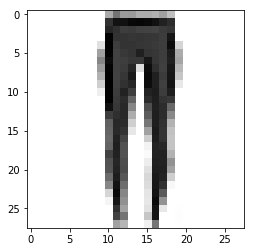

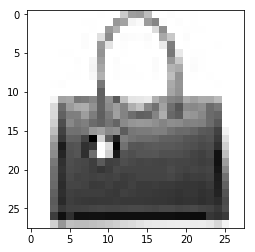

In [9]:
%matplotlib inline
image_1 = fashion_mnist.train.images[58].reshape(28,28)
image_2 = fashion_mnist.train.images[80].reshape(28,28)

plt.imshow(image_1, cmap='Greys')
plt.show()
plt.imshow(image_2, cmap='Greys')
plt.show()


In [16]:
# Create Placeholders
tf.reset_default_graph()
X = tf.placeholder(dtype=tf.float32, shape=[None, 784], name='X')
Y = tf.placeholder(dtype=tf.float32, shape=[None, 10], name='Y')

In [17]:
def neural_network_model(data):
    
    #Define the parameters for a 3 layer neural network.
    #1st layer will have 256 neurons
    #2nd layer will have 256 neurons
    #3rd layer i.e the output layer will have 10 neurons equal to the output class
    W1 = tf.get_variable("W1", [784, 256], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [256], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [256, 256], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [256], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [256, 10], initializer=tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [10], initializer = tf.zeros_initializer())
    
    Z1 = tf.add(tf.matmul(data, W1), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(A1, W2), b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(A2, W3), b3)
    
    return Z3

In [18]:
def train_neural_network(x):
    #Train the neural network with a batch size of 100 and 10 epochs. We will use the Adam Optimizer with the hyperparameters
    # being the default. Also plot the cost function
    
    no_of_epochs = 10
    batch_size = 100
    costs = []
    m = fashion_mnist.train.num_examples
    predictions = neural_network_model(x)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=Y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        
        for epoch in range(no_of_epochs):
            num_of_minibatches = int(m / batch_size)
            epoch_loss = 0
            
            for _ in range(int(fashion_mnist.train.num_examples/batch_size)):
                epoch_x, epoch_y = fashion_mnist.train.next_batch(batch_size)
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X:epoch_x, Y:epoch_y})
                epoch_loss += minibatch_cost / num_of_minibatches
                
            costs.append(epoch_loss)
            print('Epoch ', epoch, 'completed out of ',no_of_epochs,'loss: ',epoch_loss)
            
        #Plot the cost function
        plt.plot(np.squeeze(costs), color='#2A688B')
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.show()
        
        #calculate the accuracy on MNIST test images
        correct = tf.equal(tf.argmax(predictions, 1), tf.argmax(Y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:',accuracy.eval({x:fashion_mnist.test.images, Y:fashion_mnist.test.labels}))
    
    

Epoch  0 completed out of  10 loss:  0.502952392779
Epoch  1 completed out of  10 loss:  0.36108673326
Epoch  2 completed out of  10 loss:  0.325641996996
Epoch  3 completed out of  10 loss:  0.299651690938
Epoch  4 completed out of  10 loss:  0.28146478592
Epoch  5 completed out of  10 loss:  0.27068602398
Epoch  6 completed out of  10 loss:  0.253459171964
Epoch  7 completed out of  10 loss:  0.244842969924
Epoch  8 completed out of  10 loss:  0.233755605925
Epoch  9 completed out of  10 loss:  0.222815025774


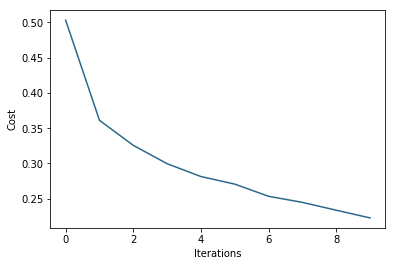

Accuracy: 0.879


In [19]:
#Train the network and calculate the accuracy on the test images.
train_neural_network(X)